In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# read excel building data
df = pd.read_excel('ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
# rename columns
column_names = {'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 
                'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [6]:
df = df.rename(columns = column_names)
# select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

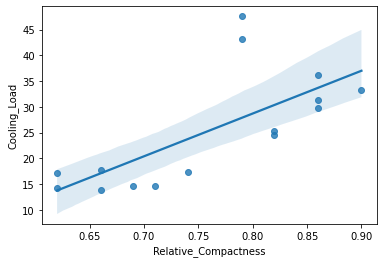

In [7]:
# regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

# Measuring Regression Performance
# Mean Absolute Error (MAE)

In [8]:
# first, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']


In [9]:
# Splitting into training and testing dataset.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)
linear_model = LinearRegression()
# fit the model to the training dataset
linear_model.fit(x_train, y_train)
# obtaining predictions
predicted_values = linear_model.predict(x_test)
# MAE measurement
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predicted_values)
round(mae, 3)

0.063

In [10]:
# Residual Sum of Squares(RSS)
rss =np.sum(np.square(y_test - predicted_values))
round(rss,3)
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)
# R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

# Penaliation Methods


In [11]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

# Feature Selection and Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# Comparing the effects of regularization
def get_weights_df(model, feat, col_name):
    #     this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights =get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on ='Features')





In [13]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0       Relative_Compactness            -0.606412     -0.283471     -0.027719
1                  Roof_Area            -0.328099     -0.163192     -0.000000
2               Surface_Area            -0.235022     -0.062275      0.000000
3                Orientation             0.003399      0.003369      0.000000
4                  Wall_Area             0.018947      0.103061      0.200087
5  Glazing_Area_Distribution             0.028452      0.029088      0.021431
6               Glazing_Area             0.215042      0.212449      0.206132
7             Overall_Height             0.393549      0.442467      0.463482
